# Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## Read csv

In [136]:
csv_data = list()

with open("/content/sample_data/digits.csv") as file:
    reader = csv.DictReader(file)
    csv_data = [i for i in reader]

In [137]:
data = [[int(i["label"]), [int(i[j]) for j in i.keys() if j != "label"]] for i in csv_data]

## Part 1

In [138]:
two_last_line = list()
two_last_line.append(data.pop())
two_last_line.append(data.pop())
two_last_line = [two_last_line[1], two_last_line[0]]

## Part 2

In [139]:
bin_data = [[i[0], [int(j >= 128) for j in i[1]]] for i in data]
two_last_line = [[i[0], [int(j >= 128) for j in i[1]]] for i in two_last_line]

## Part 3

9


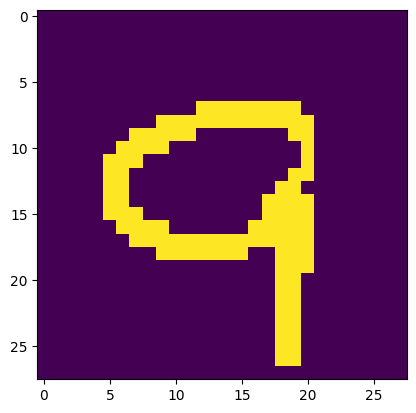

In [ ]:
random_case = bin_data[np.random.randint(0, len(bin_data))]
img_m = np.reshape(random_case[1], (28,28))
print(random_case[0])
_ = plt.imshow(img_m)

## Part 4

In [ ]:
## you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display
import matplotlib.animation as animation

In [ ]:
def update(fy: np.array, n:bool) -> np.array:
    p = np.linspace(0,1,t)
    # calculate P(N = n| Y = p) which is a bernouli distribution
    # calculate integral(0 -> 1) fy * pny
    pny = stats.bernoulli.pmf(n, p)
    integral = np.sum(pny * fy / t)
    post = pny * fy / integral
    return post

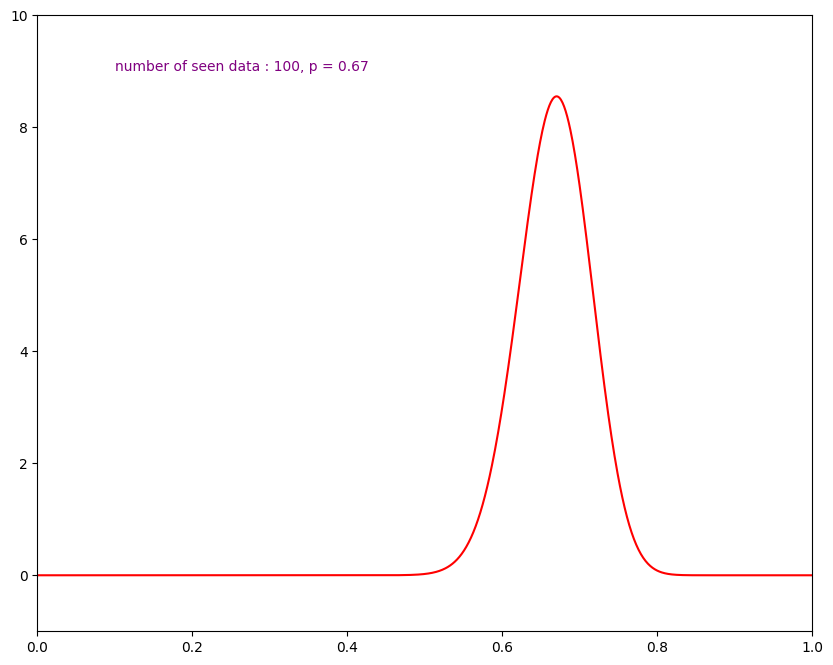

<Figure size 1000x800 with 0 Axes>

In [ ]:
t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)
history = list()

plt.figure(figsize=(10,8))
counter = 0
selected_pixel = 404
for i in bin_data:
    if i[0] != 8:
      continue
    counter += 1
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n = i[1][selected_pixel]
    fy = update(fy, n)
    history.append([p, fy])

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {counter}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)

### Create GIF

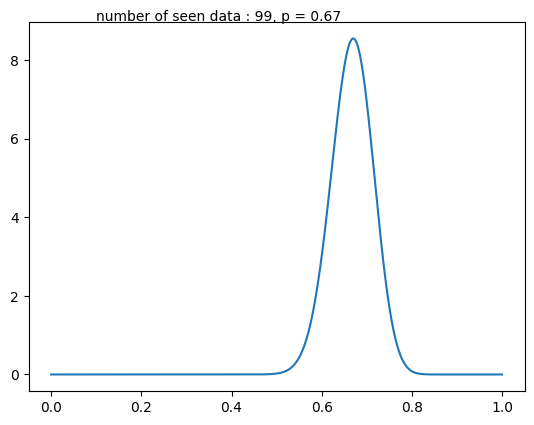

In [ ]:
fig, ax = plt.subplots()
x_values = list(range(0, 1))
y_values = history
line, = ax.plot(history[99][0], history[99][1])
time_text = ax.text(0.1,9, '')


def update_2(frame):
    line.set_data(history[frame][0], history[frame][1])
    time_text.set_text(f'number of seen data : {frame}, p = {history[frame][1].argmax() / t :.2f}')
    return line,

ani = animation.FuncAnimation(fig, update_2, frames=len(history), interval=500, blit=True)

ani.save('function_animation.gif', writer='pillow')
plt.show()

## Part 5

In [113]:
def calculate_pixel(label: int, selected_pixel : int):
  t = 1000
  p = np.linspace(0,1,t)
  fy = stats.beta.pdf(p, a=1, b=1)

  counter = 0
  for i in bin_data:
      if i[0] != label:
        continue
      counter += 1
      n = i[1][selected_pixel]
      fy = update(fy, n)

  return fy.argmax() / t

In [114]:
def calculate_f_for_all_pixel(label : int):
  out = list()
  for i in range(len(bin_data[0][1])):
    out.append(calculate_pixel(label, i))
  return out

In [115]:
px_label = dict()
for i in {8, 9}:
  px_label[i] = calculate_f_for_all_pixel(i)

In [119]:
print(len(px_label[8]))
print(len(px_label[9]))

784
784


## Part 6

In [140]:
def cal_p_X_label(img):
  p_X_label = dict()
  for label in {8, 9}:
    p_X_label[label] = 1
    for i in range(len(px_label[label])):
      p_X_label[label] *= (px_label[label][i] ** img[i]) * ((1 - px_label[label][i]) ** (1 - img[i]))
  return p_X_label

In [141]:
def cal_p_label_X(label : int, img):
  p_X_label = cal_p_X_label(img)
  p_label = {i: 1 / 2 for i in {8,9}}

  ans_sum = 0
  for i in {8, 9}:
    ans_sum += p_X_label[i] + p[i]

  p_label_X = p_X_label[label] * p[label] / ans_sum
  return p_label_X

In [142]:
p_label_X = dict()
for label in {8, 9}:
  p_label_X[label] = dict()
  for X in range(len(two_last_line)):
    p_label_X[label][X] = cal_p_label_X(label, two_last_line[X][1])

In [149]:
guess = dict()
if p_label_X[8][0] > p_label_X[9][0]:
  guess[201] = 8
else:
  guess[201] = 9

if p_label_X[8][1] > p_label_X[9][1]:
  guess[202] = 8
else:
  guess[202] = 9

print(p_label_X)
print(f"for 201: guess: {guess[201]}, ans: {two_last_line[0][0]}, is_True: {two_last_line[0][0] == guess[201]}")
print(f"for 202: guess: {guess[202]}, ans: {two_last_line[1][0]}, is_True: {two_last_line[1][0] == guess[202]}")

{8: {0: 6.382202468734408e-70, 1: 1.6310256117046204e-69}, 9: {0: 1.8839824851423493e-73, 1: 2.8874908532820055e-51}}
for 201: guess: 8, ans: 8, is_True: True
for 202: guess: 9, ans: 9, is_True: True
